In [7]:
from google.colab import files
uploaded = files.upload()

Saving A.csv to A (1).csv


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
df = pd.read_csv('A.csv', encoding="utf-8")
df.head()

,ID,Customer Name,Division,Gender,MaritalStatus,Age,Income,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,BU79786,Christine,Dhaka,F,Married,42.0,56274.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,QZ44356,Susan,Rajshahi,F,Single,32.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AI49188,Margaret,Khulna,F,Married,48.0,48767.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,WW63253,David,Barishal,M,Married,32.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,HB64268,Peter,Mymensingh,M,Single,24.0,43836.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df = df[['Customer Name', 'Division', 'Gender', 'MaritalStatus', 'Age', 'Income']]
df.head()

,Customer Name,Division,Gender,MaritalStatus,Age,Income
0,Christine,Dhaka,F,Married,42.0,56274.0
1,Susan,Rajshahi,F,Single,32.0,0.0
2,Margaret,Khulna,F,Married,48.0,48767.0
3,David,Barishal,M,Married,32.0,0.0
4,Peter,Mymensingh,M,Single,24.0,43836.0


In [10]:
df = df.dropna()
unique_divisions= list(df['Division'].unique())
print(unique_divisions)
print("Unique", len(unique_divisions))
division_count = {}
for i in df.index:
    if df["Division"][i] in division_count.keys():
        division_count[df["Division"][i]] += 1
    else:
        division_count[df["Division"][i]] = 1
print(division_count)

['Dhaka', 'Rajshahi', 'Khulna', 'Barishal', 'Mymensingh', 'Sylhet', 'Rangpur', 'Chattogram']
Unique 8
{'Dhaka': 6, 'Rajshahi': 6, 'Khulna': 7, 'Barishal': 4, 'Mymensingh': 6, 'Sylhet': 7, 'Rangpur': 7, 'Chattogram': 7}


[[6]
 [6]
 [7]
 [4]
 [6]
 [7]
 [7]
 [7]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-11-3c54c85153a2>:9: ConvergenceWarning: Number of dis

[7.5, 1.7142857142857144, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


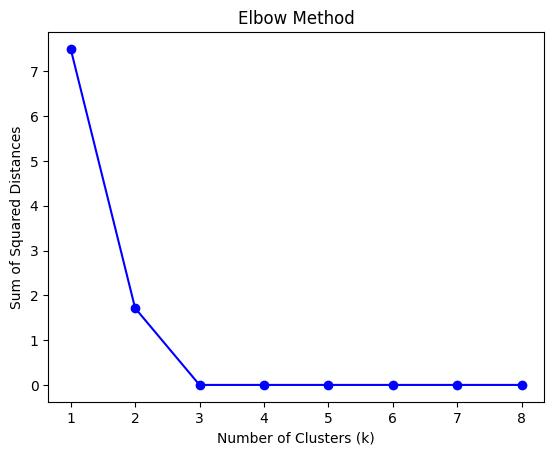

In [11]:
data = np.array(list(division_count.values())).reshape(-1,1)
print(data)

k_values = range(1, 9)

sse = []
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    sse.append(kmeans.inertia_)
print(sse)

plt.plot(k_values, sse, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')
plt.show()

[[6]
 [6]
 [7]
 [4]
 [6]
 [7]
 [7]
 [7]]
[0 0 2 1 0 2 2 2]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


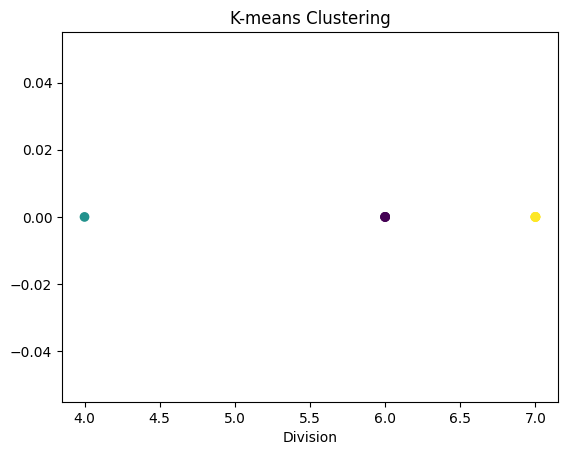

In [12]:
print(data)
kmeans = KMeans(n_clusters=3)

kmeans.fit(data)

labels = kmeans.labels_

print(labels)
plt.scatter(data, np.zeros_like(data), c=labels, cmap='viridis')
plt.xlabel('Division')
plt.title('K-means Clustering')
plt.show()